# Partie entrainement

## Chargement des données

On commence par charger les données d'entrainement. On utilise pour cela les fonctions définies api.py.

In [10]:
import api
from skimage import io

In [4]:
images = api.load_images('project_train/train')
labels = api.load_labels('project_train/label.txt')

Ces fonctions importent les images dans une liste d'images et les convertit en noir et blanc.

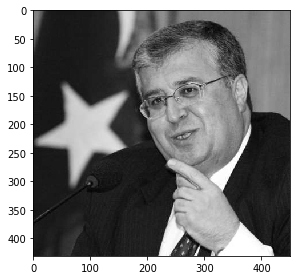

In [7]:
io.imshow(images[0])
io.show()

Les labels sont quant à eux sauvegardés dans un panda.DataFrame.

In [8]:
labels.head()

k   i    j    h    l
0  1  40  179  241  179
1  2  19   60  135   89
2  2  87  156   83   55
3  2  47  295  139   89
4  3  24  108  107   73

## Préparation des données d'entrainement

L'entrainement est effectué en utilisant la classe FaceDetectorTrainer. On peut donc commencer par instancier un objet de cette classe. Les parametres sont à déterminer expérimentalement mais on peut se baser sur l'image viualisée au dessus pour estimer une taille de fenetre, un pas et des facteurs de redimensionnement. On choisis aussi d'entrainer un classifieur AdaBoost basé sur un SV, auquel on passera les histogrammes de gradients orientés des images.

In [17]:
from FaceDetectorTrainer import FaceDetectorTrainer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from skimage.feature import hog

In [18]:
cls = AdaBoostClassifier(
    base_estimator=LinearSVC(),
    n_estimators=100,
)
(hauteur, largeur) = (300, 225)
pas = 60
facteurs = [.5, .7, .9]
transformation = lambda im: hog(im, block_norm='L-Hys')
trainer = FaceDetectorTrainer(
    windows_size = (hauteur, largeur),
    windows_step = pas,
    resizing_factors = facteurs,
    transform_function = transformation,
    classifier = cls
)

On lance ensuite l'entrainement à partir 